In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
class Processing_img:
    
    """
    Class to processing a checkerboard's images
    """
    
    def count_pieces(self,path_img,colors):
        
        """
        Count the quantity of pieces of all colors passed 
        
        This function recieves:
            path_img: path to image which will be processed
            colors  : list of all colors to be search in a image (list of list of tuples, 
                                                                  where the first index of tuple is a lower colorspace
                                                                  and the second are the upper colorspace)
        
        return: a message of how many objects was encountered for each color respectively
        """
        img = cv2.imread(path_img)

        for lower, upper in colors:

            output = img.copy()
            mask = cv2.inRange(img,lower,upper) 
            circles = cv2.HoughCircles(mask,cv2.HOUGH_GRADIENT,1,20,param1=20,param2=8,
                                       minRadius=0,maxRadius=20)    
            pieces = 0
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")

                for (x, y, r) in circles:
                    cv2.circle(output, (x, y), r, (255, 0, 255), 2)
                    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (255, 0, 255), -1)
                    pieces = pieces + 1

                print ('No. of pieces detected = {}'.format(pieces))
                
    def search_all_rectangles(self,path_img):
        """
        Search all rectangles of checksboard image 
        
        This function recieves:
            path_img: path to image which will be processed
            
        return: a plot of image which all top left coordinates find draw in, save the results
                on directory of all rectangles find in 'output' in csv format and the image itself 
        """
        img = cv2.imread(path_img)

        blur = cv2.medianBlur(img,3) # apply a median blur to smooth the image 

        img_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

        ret, thresh = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        all_contours = []

        for c in contours:
            approx = cv2.approxPolyDP(c, 0.01*cv2.arcLength(c, True), True)
            x1, y1, w, h = cv2.boundingRect(approx)
            cv2.drawContours(img, [approx], 0, (0, 255, 0), 5)
            all_contours.append(np.array((x1, y1)))

        all_contours = np.unique(all_contours, axis=0) # here we just remove the copies of rectangles findout

        img = cv2.imread(img_path)

        radius = 2

        color = (255, 0, 0)

        thickness = 2

        all_first = []

        new_contours = []

        for i, contour in enumerate(all_contours): # and fill the rest of points which was not automatically finded

            new_contours.append(contour)

            if (contour[0] not in all_first):
                all_first.append(contour[0])

            if(len(all_first) % 2 == 0):
                new_contours.append(np.array([contour[0] - 35, contour[1]]))

            else:
                new_contours.append(np.array([contour[0] + 35, contour[1]]))

        for c in new_contours:
            image = cv2.circle(img, (c[0], c[1]), radius, color, thickness)
        
#         try: 
#             os.mkdir('output')
#         except OSError as error: 
#             print(error)
        
        savepd.DataFrame(new_contours).to_csv('output/rectangle_results.csv')
        
#         plt.imshow(image)
        return image
        
    def extract_only_checkerboard(self,path_img):
        """
        Extract the checkerboard itself from a image which have pieces of color red and green
        
        This function recieves:
            path_img: path to image which will be processed
            
        return: a plot of the result image and the image itself 
        """
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        green = [(0, 40, 0),(150, 255, 255)]

        red = [(40, 0, 0), (255, 50, 255)]

        mask_red = cv2.inRange(img,red[0], red[1])

        mask_green = cv2.inRange(img,green[0], green[1])

        img[mask_red > 0] = 0
        img[mask_green > 0] = 0
 
        plt.imshow(img)

In [3]:
processing_img = Processing_img()

img_path = 'tabuleiro_dama/dama (1).jpeg'

red = [(0,0,235),(15,15,255)]
green = [(0, 191, 0),(110, 255, 70)]

dot_colors = [red, green]

processing_img.count_pieces(img_path,dot_colors)

No. of pieces detected = 18
No. of pieces detected = 15


In [4]:
processing_img.search_all_rectangles(img_path)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

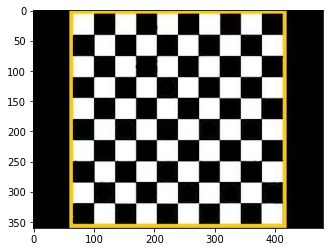

In [5]:
processing_img.extract_only_checkerboard(img_path)